## Implementing K-Nearest Neighbours for Flower Classification

In this notebook, we will implement a kNN (k-Nearest Neighbour) algorithm to help us classify flower species.

In [1]:
import time
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
plt.style.use("seaborn-dark")
%matplotlib inline

### 1. Visualization of the Data

In [2]:
data = datasets.load_iris()
data.keys()

dict_keys(['target', 'data', 'target_names', 'DESCR', 'feature_names'])

Reading the data into a Pandas dataframe makes it easy to organize the data visually (if needed) and comes with several easy ways to create plots. 

Otherwise, there are more straightfoward methods to load the data and build our KNN model. (shown in next section)

In [3]:
df = pd.DataFrame(data.data,columns=data.feature_names)
df["species"] = [data.target_names[i] for i in data.target]
df["species_num"] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_num
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


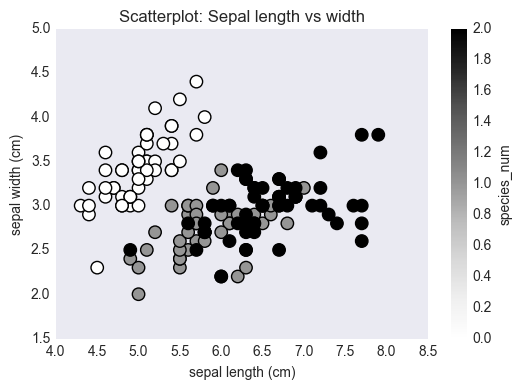

In [4]:
df.plot.scatter(x="sepal length (cm)", y="sepal width (cm)",c="species_num",s=80,figsize=(6,4),sharex=False)
plt.title("Scatterplot: Sepal length vs width")

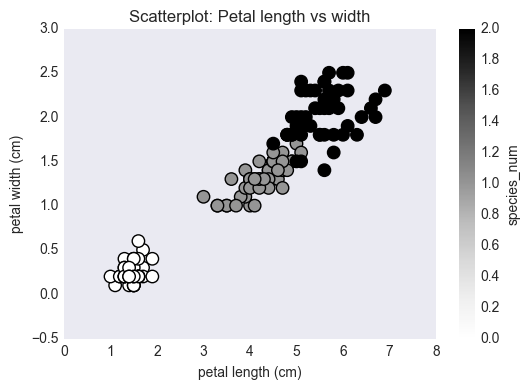

In [5]:
df.plot.scatter(x="petal length (cm)", y="petal width (cm)",c="species_num",s=80,figsize=(6,4),sharex=False)
plt.title("Scatterplot: Petal length vs width")

### 2. Setting up the data for our KNN model

When building our KNN, we want to use majority of the data to train the model, and leave a portion of the data aside as our test set. This is done so that after training, we can evaluate our model fairly to see if it generalizes well to data it has not seen before.

In [6]:
del df
X, y = datasets.load_iris(return_X_y=True)

In [7]:
test_size = 25

## Randomly shuffle data
np.random.seed(1)
mask = np.random.permutation(range(len(X)))
X = X[mask]
y = y[mask].reshape(-1,1)

## Assign to training and testing sets
X_train = X[test_size:,:]
y_train = y[test_size:,:]
X_test = X[0:test_size,:]
y_test = y[0:test_size,:]
del X

### 3. Building our KNN model

In [8]:
def knn_predict(X_train,y_train,X_test,k=5):
    ## Initialize empty array to hold predictions
    predictions = np.zeros((X_test.shape[0],1))
    for i,x in enumerate(X_test):
        ## Calculate squared (L2) distances between test and train set
        l2 = np.sum(np.square(X_train - x),axis=1,keepdims=True)
        ## Sort the distances in descending order to pick the k nearest neighbours
        sort_index = np.squeeze(np.argsort(l2,axis=0))
        neighbours = np.squeeze(y_train[sort_index[0:k]])
        ## Perform voting amongst the k neighbours to determine the class
        classes, counts = np.unique(neighbours,return_counts=True)
        predictions[i,0]= classes[np.argmax(counts)]
    return predictions

In [9]:
## Function to help us evaluate accuracy
def accuracy(prediction,actual):
    return np.sum(prediction == actual)/len(prediction)

### 4. Evaluating the KNN model

In [10]:
## Use the training set to predict classes of flowers for the test set
prediction = knn_predict(X_train,y_train,X_test,k=10)
print("Accuracy on Test Set: {:.2f}%".format(accuracy(prediction,y_test)*100))

Accuracy on Test Set: 96.00%


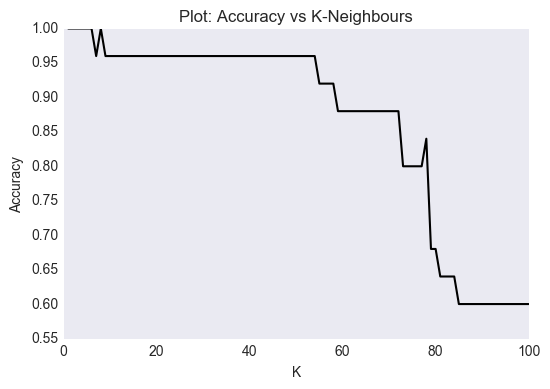

In [15]:
## Try out a range of k's
max_k = 100
preds = []
for i in range(max_k):
    preds.append(accuracy(knn_predict(X_train,y_train,X_test,k=i+1),y_test))
plt.plot(list(range(1,max_k+1)),preds,c="black",linewidth=1.5)
plt.title("Plot: Accuracy vs K-Neighbours")
plt.xlabel("K")
plt.ylabel("Accuracy")